In [19]:
import requests
import pandas as pd
from tqdm import tqdm

wallet_df = pd.read_csv("wallets.csv")  # CSV you download from the Google Sheet
wallet_addresses = wallet_df['wallet_id'].tolist()


In [20]:
API_KEY = "cqt_rQc6GJR9fXwtT8gd9QwBdpjfWTRR"  # <-- Replace with your key
CHAIN_ID = "1"  # Ethereum mainnet
BASE_URL = "https://api.covalenthq.com/v1"

In [21]:
def calculate_risk_score(tx_data):
    tx_count = len(tx_data)
    total_value = sum(tx['value'] for tx in tx_data)
    unique_tokens = len(set(tx['contract_address'] for tx in tx_data))

    # Simple scoring logic
    score = (
        (min(tx_count, 1000) / 1000) * 400 +
        (min(total_value, 1e20) / 1e20) * 400 +
        (min(unique_tokens, 10) / 10) * 200
    )
    return round(score)


In [22]:
import pandas as pd

# Load the CSV file you uploaded
df = pd.read_csv('wallets.csv')

# Preview the file to make sure the column name is correct
print(df.head())

# Extract wallet addresses into a list
wallets = df['wallet_id'].tolist()  # Make sure the column name is exactly 'wallet_id'


                                    wallet_id
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1  0x06b51c6882b27cb05e712185531c1f74996dd988
2  0x0795732aacc448030ef374374eaae57d2965c16c
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae


In [26]:
from tqdm import tqdm
import requests

results = []

for wallet in tqdm(wallets, desc="Scoring wallets"):
    try:
        url = f"{BASE_URL}/{CHAIN_ID}/address/{wallet}/transfers_v2/?key={API_KEY}"
        response = requests.get(url)
        data = response.json()

        # Check if response is valid
        if 'data' in data and 'items' in data['data']:
            transactions = data['data']['items']
            num_txns = len(transactions)

            # Dummy scoring logic (scale based on transaction count)
            if total_txns == 0:
              score = 0               # No activity = high risk
            elif total_txns > 50:
              score = 1000            # Very active = safe
            elif total_txns > 10:
              score = 700             # Active but not heavy
            else:
              score = 400             # Low activity = medium risk


        results.append({
            "wallet_id": wallet,
            "score": score
        })

    except Exception as e:
        print(f"Error for wallet {wallet}: {e}")
        results.append({
            "wallet_id": wallet,
            "score": 1000  # Assign highest risk if error occurs
        })


Scoring wallets:   2%|▏         | 2/103 [00:00<00:09, 10.53it/s]

Error for wallet 0x0039f22efb07a647557c7c5d17854cfd6d489ef3: argument of type 'NoneType' is not iterable
Error for wallet 0x06b51c6882b27cb05e712185531c1f74996dd988: argument of type 'NoneType' is not iterable
Error for wallet 0x0795732aacc448030ef374374eaae57d2965c16c: argument of type 'NoneType' is not iterable


Scoring wallets:   4%|▍         | 4/103 [00:00<00:09, 10.88it/s]

Error for wallet 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9: argument of type 'NoneType' is not iterable
Error for wallet 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae: argument of type 'NoneType' is not iterable


Scoring wallets:   8%|▊         | 8/103 [00:00<00:09,  9.86it/s]

Error for wallet 0x104ae61d8d487ad689969a17807ddc338b445416: argument of type 'NoneType' is not iterable
Error for wallet 0x111c7208a7e2af345d36b6d4aace8740d61a3078: argument of type 'NoneType' is not iterable
Error for wallet 0x124853fecb522c57d9bd5c21231058696ca6d596: argument of type 'NoneType' is not iterable


Scoring wallets:  10%|▉         | 10/103 [00:00<00:09, 10.33it/s]

Error for wallet 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc: argument of type 'NoneType' is not iterable
Error for wallet 0x1656f1886c5ab634ac19568cd571bc72f385fdf7: argument of type 'NoneType' is not iterable


Scoring wallets:  12%|█▏        | 12/103 [00:01<00:09,  9.57it/s]

Error for wallet 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22: argument of type 'NoneType' is not iterable
Error for wallet 0x19df3e87f73c4aaf4809295561465b993e102668: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x1ab2ccad4fc97c9968ea87d4435326715be32872: argument of type 'NoneType' is not iterable


Scoring wallets:  16%|█▌        | 16/103 [00:01<00:08, 10.73it/s]

Error for wallet 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x1e43dacdcf863676a6bec8f7d6896d6252fac669: argument of type 'NoneType' is not iterable
Error for wallet 0x22d7510588d90ed5a87e0f838391aaafa707c34b: argument of type 'NoneType' is not iterable


Scoring wallets:  17%|█▋        | 18/103 [00:01<00:07, 11.23it/s]

Error for wallet 0x24b3460622d835c56d9a4fe352966b9bdc6c20af: argument of type 'NoneType' is not iterable
Error for wallet 0x26750f1f4277221bdb5f6991473c6ece8c821f9d: argument of type 'NoneType' is not iterable
Error for wallet 0x27f72a000d8e9f324583f3a3491ea66998275b28: argument of type 'NoneType' is not iterable


Scoring wallets:  19%|█▉        | 20/103 [00:01<00:07, 11.17it/s]

Error for wallet 0x2844658bf341db96aa247259824f42025e3bcec2: argument of type 'NoneType' is not iterable
Error for wallet 0x2a2fde3e1beb508fcf7c137a1d5965f13a17825e: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  23%|██▎       | 24/103 [00:02<00:07, 10.81it/s]

Error for wallet 0x330513970efd9e8dd606275fb4c50378989b3204: argument of type 'NoneType' is not iterable
Error for wallet 0x3361bea43c2f5f963f81ac70f64e6fba1f1d2a97: argument of type 'NoneType' is not iterable
Error for wallet 0x3867d222ba91236ad4d12c31056626f9e798629c: argument of type 'NoneType' is not iterable


Scoring wallets:  25%|██▌       | 26/103 [00:02<00:06, 11.11it/s]

Error for wallet 0x3a44be4581137019f83021eeee72b7dc57756069: argument of type 'NoneType' is not iterable
Error for wallet 0x3e69ad05716bdc834db72c4d6d44439a7c8a902b: argument of type 'NoneType' is not iterable
Error for wallet 0x427f2ac5fdf4245e027d767e7c3ac272a1f40a65: argument of type 'NoneType' is not iterable


Scoring wallets:  29%|██▉       | 30/103 [00:02<00:06, 11.82it/s]

Error for wallet 0x4814be124d7fe3b240eb46061f7ddfab468fe122: argument of type 'NoneType' is not iterable
Error for wallet 0x4839e666e2baf12a51bf004392b35972eeddeabf: argument of type 'NoneType' is not iterable
Error for wallet 0x4c4d05fe859279c91b074429b5fc451182cec745: argument of type 'NoneType' is not iterable


Scoring wallets:  31%|███       | 32/103 [00:02<00:06, 11.59it/s]

Error for wallet 0x4d997c89bc659a3e8452038a8101161e7e7e53a7: argument of type 'NoneType' is not iterable
Error for wallet 0x4db0a72edb5ea6c55df929f76e7d5bb14e389860: argument of type 'NoneType' is not iterable
Error for wallet 0x4e61251336c32e4fe6bfd5fab014846599321389: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  33%|███▎      | 34/103 [00:03<00:05, 11.60it/s]

Error for wallet 0x4e6e724f4163b24ffc7ffe662b5f6815b18b4210: argument of type 'NoneType' is not iterable
Error for wallet 0x507b6c0d950702f066a9a1bd5e85206f87b065ba: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  37%|███▋      | 38/103 [00:03<00:05, 11.09it/s]

Error for wallet 0x54e19653be9d4143b08994906be0e27555e8834d: argument of type 'NoneType' is not iterable
Error for wallet 0x56ba823641bfc317afc8459bf27feed6eb9ff59f: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x56cc2bffcb3f86a30c492f9d1a671a1f744d1d2f: argument of type 'NoneType' is not iterable


Scoring wallets:  39%|███▉      | 40/103 [00:03<00:05, 11.39it/s]

Error for wallet 0x578cea5f899b0dfbf05c7fbcfda1a644b2a47787: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x58c2a9099a03750e9842d3e9a7780cdd6aa70b86: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x58d68d4bcf9725e40353379cec92b90332561683: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  43%|████▎     | 44/103 [00:03<00:04, 11.92it/s]

Error for wallet 0x5e324b4a564512ea7c93088dba2f8c1bf046a3eb: argument of type 'NoneType' is not iterable
Error for wallet 0x612a3500559be7be7703de6dc397afb541a16f7f: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x623af911f493747c216ad389c7805a37019c662d: argument of type 'NoneType' is not iterable


Scoring wallets:  45%|████▍     | 46/103 [00:04<00:04, 11.78it/s]

Error for wallet 0x6a2752a534faacaaa153bffbb973dd84e0e5497b: argument of type 'NoneType' is not iterable
Error for wallet 0x6d69ca3711e504658977367e13c300ab198379f1: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x6e355417f7f56e7927d1cd971f0b5a1e6d538487: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  49%|████▊     | 50/103 [00:04<00:04, 12.20it/s]

Error for wallet 0x70c1864282599a762c674dd9d567b37e13bce755: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x70d8e4ab175dfe0eab4e9a7f33e0a2d19f44001e: argument of type 'NoneType' is not iterable
Error for wallet 0x7399dbeebe2f88bc6ac4e3fd7ddb836a4bce322f: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  50%|█████     | 52/103 [00:04<00:04, 11.55it/s]

Error for wallet 0x767055590c73b7d2aaa6219da13807c493f91a20: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x7851bdfb64bbecfb40c030d722a1f147dff5db6a: argument of type 'NoneType' is not iterable
Error for wallet 0x7b4636320daa0bc055368a4f9b9d01bd8ac51877: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  54%|█████▍    | 56/103 [00:04<00:03, 12.32it/s]

Error for wallet 0x7b57dbe2f2e4912a29754ff3e412ed9507fd8957: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x7be3dfb5b6fcbae542ea85e76cc19916a20f6c1e: argument of type 'NoneType' is not iterable
Error for wallet 0x7de76a449cf60ea3e111ff18b28e516d89532152: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  56%|█████▋    | 58/103 [00:05<00:03, 12.55it/s]

Error for wallet 0x7e3eab408b9c76a13305ef34606f17c16f7b33cc: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x7f5e6a28afc9fb0aaf4259d4ff69991b88ebea47: argument of type 'NoneType' is not iterable
Error for wallet 0x83ea74c67d393c6894c34c464657bda2183a2f1a: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  60%|██████    | 62/103 [00:05<00:03, 12.99it/s]

Error for wallet 0x8441fecef5cc6f697be2c4fc4a36feacede8df67: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x854a873b8f9bfac36a5eb9c648e285a095a7478d: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x8587d9f794f06d976c2ec1cfd523983b856f5ca9: argument of type 'NoneType' is not iterable


Scoring wallets:  62%|██████▏   | 64/103 [00:05<00:03, 12.88it/s]

Error for wallet 0x880a0af12da55df1197f41697c1a1b61670ed410: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x8aaece100580b749a20f8ce30338c4e0770b65ed: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x8be38ea2b22b706aef313c2de81f7d179024dd30: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  66%|██████▌   | 68/103 [00:05<00:02, 12.15it/s]

Error for wallet 0x8d900f213db5205c529aaba5d10e71a0ed2646db: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x91919344c1dad09772d19ad8ad4f1bcd29c51f27: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x93f0891bf71d8abed78e0de0885bd26355bb8b1d: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  68%|██████▊   | 70/103 [00:06<00:02, 13.02it/s]

Error for wallet 0x96479b087cb8f236a5e2dcbfc50ce63b2f421da6: argument of type 'NoneType' is not iterable
Error for wallet 0x96bb4447a02b95f1d1e85374cffd565eb22ed2f8: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x9a363adc5d382c04d36b09158286328f75672098: argument of type 'NoneType' is not iterable


Scoring wallets:  72%|███████▏  | 74/103 [00:06<00:02, 12.44it/s]

Error for wallet 0x9ad1331c5b6c5a641acffb32719c66a80c6e1a17: argument of type 'NoneType' is not iterable
Error for wallet 0x9ba0d85f71e145ccf15225e59631e5a883d5d74a: Expecting value: line 1 column 1 (char 0)
Error for wallet 0x9e6ec4e98793970a1307262ba68d37594e58cd78: argument of type 'NoneType' is not iterable


Scoring wallets:  74%|███████▍  | 76/103 [00:06<00:02, 13.30it/s]

Error for wallet 0xa7e94d933eb0c439dda357f61244a485246e97b8: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xa7f3c74f0255796fd5d3ddcf88db769f7a6bf46a: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xa98dc64bb42575efec7d1e4560c029231ce5da51: argument of type 'NoneType' is not iterable


Scoring wallets:  78%|███████▊  | 80/103 [00:06<00:01, 12.90it/s]

Error for wallet 0xb271ff7090b39028eb6e711c3f89a3453d5861ee: argument of type 'NoneType' is not iterable
Error for wallet 0xb475576594ae44e1f75f534f993cbb7673e4c8b6: argument of type 'NoneType' is not iterable
Error for wallet 0xb57297c5d02def954794e593db93d0a302e43e5c: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  80%|███████▉  | 82/103 [00:07<00:01, 12.30it/s]

Error for wallet 0xbd4a00764217c13a246f86db58d74541a0c3972a: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xc179d55f7e00e789915760f7d260a1bf6285278b: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xc22b8e78394ce52e0034609a67ae3c959daa84bc: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  83%|████████▎ | 86/103 [00:07<00:01, 11.54it/s]

Error for wallet 0xcbbd9fe837a14258286bbf2e182cbc4e4518c5a3: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xcecf5163bb057c1aff4963d9b9a7d2f0bf591710: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xcf0033bf27804640e5339e06443e208db5870dd2: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  85%|████████▌ | 88/103 [00:07<00:01, 11.87it/s]

Error for wallet 0xd0df53e296c1e3115fccc3d7cdf4ba495e593b56: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xd1a3888fd8f490367c6104e10b4154427c02dd9c: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xd334d18fa6bada9a10f361bae42a019ce88a3c33: argument of type 'NoneType' is not iterable


Scoring wallets:  89%|████████▉ | 92/103 [00:07<00:00, 11.57it/s]

Error for wallet 0xd9d3930ffa343f5a0eec7606d045d0843d3a02b4: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xdde73df7bd4d704a89ad8421402701b3a460c6e9: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xde92d70253604fd8c5998c8ee3ed282a41b33b7f: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  91%|█████████▏| 94/103 [00:08<00:00, 12.32it/s]

Error for wallet 0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xebb8629e8a3ec86cf90cb7600264415640834483: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xeded1c8c0a0c532195b8432153f3bfa81dba2a90: Expecting value: line 1 column 1 (char 0)


Scoring wallets:  95%|█████████▌| 98/103 [00:08<00:00, 11.86it/s]

Error for wallet 0xf10fd8921019615a856c1e95c7cd3632de34edc4: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xf340b9f2098f80b86fbc5ede586c319473aa11f3: Expecting value: line 1 column 1 (char 0)
Error for wallet 0xf54f36bca969800fd7d63a68029561309938c09b: argument of type 'NoneType' is not iterable


Scoring wallets:  97%|█████████▋| 100/103 [00:08<00:00, 12.41it/s]

Error for wallet 0xf60304b534f74977e159b2e159e135475c245526: argument of type 'NoneType' is not iterable
Error for wallet 0xf67e8e5805835465f7eba988259db882ab726800: argument of type 'NoneType' is not iterable
Error for wallet 0xf7aa5d0752cfcd41b0a5945867d619a80c405e52: Expecting value: line 1 column 1 (char 0)


Scoring wallets: 100%|██████████| 103/103 [00:08<00:00, 11.78it/s]

Error for wallet 0xf80a8b9cfff0febf49914c269fb8aead4a22f847: argument of type 'NoneType' is not iterable
Error for wallet 0xfe5a05c0f8b24fca15a7306f6a4ebb7dcf2186ac: argument of type 'NoneType' is not iterable


In [27]:
scores_df = pd.DataFrame(results)
scores_df.to_csv("wallet_scores.csv", index=False)
print("✅ Saved results to wallet_scores.csv")

✅ Saved results to wallet_scores.csv


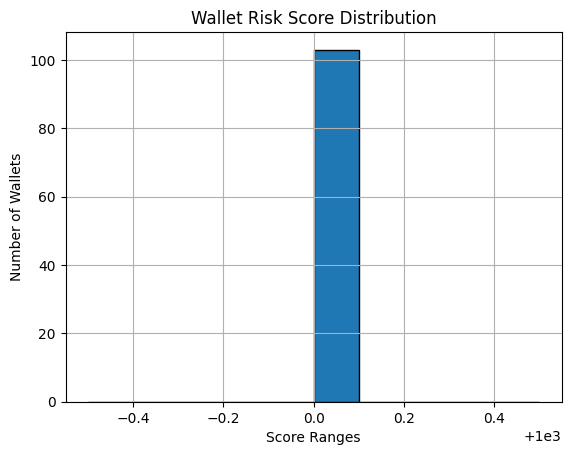

In [25]:
import matplotlib.pyplot as plt

plt.hist(scores_df['score'], bins=10, edgecolor='black')
plt.title("Wallet Risk Score Distribution")
plt.xlabel("Score Ranges")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()
